<a href="https://colab.research.google.com/github/alenabozny/context-augmentation/blob/master/LIWC_LR_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount Google Drive to the Notebook. This allows us to load datasets that are copyied to the GD directory.**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Load the dataset (LIWC features for CRED/NONCRED data)**

In [8]:
import pandas as pd
import numpy as np

statins = pd.read_csv("/content/drive/My Drive/Colab Notebooks/LIWC_paragrafy.csv", sep=";",decimal=',', header=0)
psychiatry = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/psychiatry.csv", sep=";",decimal=',', header=0)
antioxidants = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/antioxidants.csv", sep=";",decimal=',', header=0)
ssri_during_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/ssri_during_pregnancy.csv", sep=";",decimal=',', header=0)
cc_vs_nb = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/cc_vs_nb.csv", sep=";",decimal=',', header=0)
aspirin_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/aspirin_pregnancy.csv", sep=";",decimal=',', header=0)
children_antibiotics = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/children_antibiotics.csv", sep=";",decimal=',', header=0)
allergy_testing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/allergy_testing.csv", sep=";",decimal=',', header=0)
diet_and_autism = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/diet_and_autism.csv", sep=";",decimal=',', header=0)
heart_supplements = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/heart_supplements.csv", sep=";",decimal=',', header=0)
ssri_during_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/ssri_during_pregnancy.csv", sep=";",decimal=',', header=0)
steroids_for_kids = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/steroids_for_kids.csv", sep=";",decimal=',', header=0)
vaccination = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/vaccination.csv", sep=";",decimal=',', header=0)

statins['Body'].head()

0    Statins available in the United States include...
1    Statins are one of the most common medicines p...
2    They work on an enzyme that is used by our bod...
3    Yep, that’s right…our bodies make cholesterol,...
4    That’s because cholesterol is vital for our su...
Name: Body, dtype: object

In [9]:
statins_paragraphs = statins[0:1917:3]
psychiatry_paragraphs = psychiatry[0:len(psychiatry):3]
antioxidants_paragraphs = antioxidants[0:len(antioxidants):3]
ssri_during_pregnancy_paragraphs = ssri_during_pregnancy[0:len(ssri_during_pregnancy):3]
cc_vs_nb_paragraphs = cc_vs_nb[0:len(cc_vs_nb):3]
aspirin_pregnancy_paragraphs = aspirin_pregnancy[0:len(aspirin_pregnancy):3]
children_antibiotics_paragraphs = children_antibiotics[0:len(children_antibiotics):3]
allergy_testing_paragraphs = allergy_testing[0:len(allergy_testing):3]
diet_and_autism_paragraphs = diet_and_autism[0:len(diet_and_autism):3]
heart_supplements_paragraphs = heart_supplements[0:len(heart_supplements):3]
ssri_during_pregnancy_paragraphs = ssri_during_pregnancy[0:len(ssri_during_pregnancy):3]
steroids_for_kids_paragraphs = steroids_for_kids[0:len(steroids_for_kids):3]
vaccination_paragraphs = vaccination[0:len(vaccination):3]

In [16]:
vaccination_paragraphs.head()

,Source (A),Source (B),WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Good news is typically classified as no news —...,CRED,69,47.75,50.00,5.86,78.80,17.25,24.64,84.06,57.97,10.14,2.90,0.0,0.0,2.90,0.00,0.00,7.25,10.14,13.04,13.04,10.14,5.80,5.80,15.94,8.70,4.35,2.90,0.00,1.45,11.59,7.25,4.35,2.90,0.00,0.00,7.25,0.00,0.0,...,1.45,0.0,0.0,13.04,0.00,0.0,2.90,5.80,4.35,1.45,13.04,0.00,4.35,0.00,4.35,0.00,1.45,0.0,0.0,1.45,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,13.04,4.35,1.45,0.0,0.0,0.00,0,1.45,0.0,5.80,0.00,0.0
3,Now think about how many times you've heard fr...,CRED,43,90.82,75.74,77.74,3.52,10.75,23.26,88.37,51.16,6.98,2.33,0.0,0.0,2.33,0.00,0.00,4.65,11.63,18.60,4.65,11.63,6.98,2.33,11.63,6.98,2.33,2.33,0.00,6.98,2.33,0.00,2.33,0.00,0.00,0.00,11.63,2.33,0.0,...,0.00,0.0,0.0,6.98,6.98,0.0,0.00,0.00,0.00,4.65,9.30,0.00,13.95,0.00,6.98,6.98,2.33,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,18.60,4.65,2.33,0.0,0.0,2.33,0,0.00,0.0,4.65,4.65,0.0
6,The good news that you probably haven't been h...,CRED,86,71.99,36.35,34.47,25.77,21.50,26.74,82.56,51.16,5.81,1.16,0.0,0.0,1.16,0.00,0.00,4.65,10.47,11.63,10.47,6.98,9.30,2.33,13.95,9.30,3.49,1.16,0.00,2.33,9.30,4.65,4.65,2.33,0.00,1.16,3.49,0.00,0.0,...,3.49,0.0,0.0,10.47,0.00,0.0,3.49,3.49,3.49,4.65,8.14,0.00,10.47,0.00,8.14,2.33,2.33,0.0,0.0,1.16,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,16.28,3.49,3.49,0.0,0.0,0.00,0,3.49,0.0,3.49,2.33,0.0
9,Serious reactions are extremely rare. This is ...,NONCRED,51,32.13,72.17,11.28,1.00,12.75,29.41,88.24,50.98,13.73,5.88,0.0,0.0,3.92,0.00,1.96,7.84,3.92,7.84,13.73,3.92,5.88,1.96,21.57,9.80,1.96,1.96,1.96,1.96,13.73,3.92,9.80,1.96,1.96,0.00,11.76,1.96,0.0,...,5.88,0.0,0.0,7.84,1.96,0.0,1.96,0.00,3.92,5.88,19.61,0.00,1.96,0.00,1.96,0.00,0.00,0.0,0.0,0.00,0.0,1.96,0.0,0.0,0.0,0.0,0.0,0.0,11.76,5.88,1.96,0.0,0.0,0.00,0,0.00,0.0,3.92,0.00,0.0
12,Even those vaccines that are made from weakene...,CRED,88,92.14,54.52,2.40,1.00,22.00,27.27,85.23,53.41,10.23,3.41,0.0,0.0,1.14,1.14,1.14,6.82,12.50,13.64,7.95,4.55,4.55,0.00,13.64,7.95,6.82,0.00,0.00,1.14,5.68,0.00,5.68,1.14,0.00,0.00,4.55,0.00,0.0,...,11.36,0.0,0.0,6.82,0.00,0.0,4.55,0.00,2.27,3.41,9.09,1.14,5.68,1.14,2.27,2.27,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,14.77,3.41,5.68,0.0,0.0,0.00,0,1.14,0.0,0.00,4.55,0.0


In [5]:
def y_to_binary(Y):
  def label_to_0_1(lbl):
    if lbl=='CRED':
      return 1
    else:
      return 0

  Y_mapped = map(label_to_0_1, Y)
  return np.array(list(Y_mapped))

In [13]:
np.shape(vaccination_paragraphs)

(482, 95)

In [ ]:
!pip install spacytextblob

# The Model
Features:
- TFIDF
- NER
- POS
- LIWC
- sentiment

In [65]:
from sklearn.pipeline import Pipeline
# from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing as p

VALIDATION_SPLIT = 0.1

def get_y(data, y_column = 'Source (B)'):
  Y = data[y_column]
  Y = y_to_binary(Y)
  print(np.shape(Y))
  return Y

statins_Y = get_y(statins_paragraphs, y_column='Rate')
psychiatry_Y = get_y(psychiatry_paragraphs)
antioxidants_Y = get_y(antioxidants_paragraphs)
ssri_during_pregnancy_Y = get_y(ssri_during_pregnancy_paragraphs)
cc_vs_nb_Y = get_y(cc_vs_nb_paragraphs)
aspirin_pregnancy_Y = get_y(aspirin_pregnancy_paragraphs)
children_antibiotics_Y = get_y(children_antibiotics_paragraphs)
allergy_testing_Y = get_y(allergy_testing_paragraphs)
diet_and_autism_Y = get_y(diet_and_autism_paragraphs)
heart_supplements_Y = get_y(heart_supplements_paragraphs)
ssri_during_pregnancy_Y = get_y(ssri_during_pregnancy_paragraphs)
steroids_for_kids_Y = get_y(steroids_for_kids_paragraphs)
vaccination_Y = get_y(vaccination_paragraphs)

(639,)
(807,)
(225,)
(58,)
(171,)
(109,)
(185,)
(451,)
(182,)
(150,)
(58,)
(241,)
(482,)


### **TFIDF**

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk

nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk import word_tokenize, sent_tokenize

def get_X_tfidf(data, body_column='Source (A)'):
  corpus = data[body_column]
  corpus_removed_numbers = [re.sub(r'\d+', '', s) for s in corpus]

  corpus_tokenized = []
  stemmer= PorterStemmer()

  for s in corpus_removed_numbers:
    tokens = word_tokenize(s)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    corpus_tokenized.append(" ".join(stemmed_tokens))

  vectorizer = TfidfVectorizer()
  X_tfidf_array = vectorizer.fit_transform(corpus_tokenized)
  X_tfidf_array = np.array(X_tfidf_array.toarray())
  X_tfidf = pd.DataFrame(X_tfidf_array, columns=vectorizer.get_feature_names())
  print(np.shape(X_tfidf))

  return X_tfidf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
statins_X_tfidf = get_X_tfidf(statins_paragraphs, body_column='Body')
psychiatry_X_tfidf = get_X_tfidf(psychiatry_paragraphs)
antioxidants_X_tfidf = get_X_tfidf(antioxidants_paragraphs)
ssri_during_pregnancy_X_tfidf = get_X_tfidf(ssri_during_pregnancy_paragraphs)
cc_vs_nb_X_tfidf = get_X_tfidf(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_tfidf = get_X_tfidf(aspirin_pregnancy_paragraphs)
children_antibiotics_X_tfidf = get_X_tfidf(children_antibiotics_paragraphs)
allergy_testing_X_tfidf = get_X_tfidf(allergy_testing_paragraphs)
diet_and_autism_X_tfidf = get_X_tfidf(diet_and_autism_paragraphs)
heart_supplements_X_tfidf = get_X_tfidf(heart_supplements_paragraphs)
ssri_during_pregnancy_X_tfidf = get_X_tfidf(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_tfidf = get_X_tfidf(steroids_for_kids_paragraphs)
vaccination_X_tfidf = get_X_tfidf(vaccination_paragraphs)

(639, 3352)
(807, 4013)
(225, 1565)
(58, 889)
(171, 1511)
(109, 1219)
(185, 1567)
(451, 2231)
(182, 1695)
(150, 1431)
(58, 889)
(241, 1407)
(482, 2742)


In [70]:
diet_and_autism_X_tfidf.head()

,abil,abl,abnorm,about,abov,above,absenc,absorb,absorpt,abstract,abyssinian,academ,academi,accept,accompani,accord,account,accur,achiev,acid,acidgravi,acidluncheon,acidophilu,act,action,activ,active,actual,ad,adapt,add,addict,addit,address,adequ,adh,admit,adolesc,adulthood,advanc,...,wheyhalf,whi,which,while,white,whiten,who,wholem,whose,wide,wild,will,willow,with,withdraw,without,work,world,worri,wors,worsen,worst,worth,would,write,www,xanthan,xylitol,ye,year,yeast,yet,yoghurt,yogurt,you,young,your,zachari,zinc,â¾
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.148121,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119568,0.0,0.0,0.0,0.191644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081590,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.162516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.131819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**NER**

In [73]:
import spacy
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

nlp = en_core_web_sm.load()

def get_X_ner(data, body_column='Source (A)'):
  corpus = data[body_column]
  X_ner_counters = []
  X_ner_array = []
  meta_counter = Counter()

  for s in corpus:
    doc = nlp(s)
    labels = [x.label_ for x in doc.ents]
    X_ner_counters.append(Counter(labels))
    meta_counter += Counter(labels)

  for c in X_ner_counters:
    X_ner_array.append([c[key] for key in list(meta_counter.keys())])

  X_ner = pd.DataFrame(X_ner_array, columns=list(meta_counter.keys()))
  print(np.shape(X_ner))
  
  return X_ner

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [74]:
statins_X_ner = get_X_ner(statins_paragraphs, body_column='Body')
psychiatry_X_ner = get_X_ner(psychiatry_paragraphs)
antioxidants_X_ner = get_X_ner(antioxidants_paragraphs)
ssri_during_pregnancy_X_ner = get_X_ner(ssri_during_pregnancy_paragraphs)
cc_vs_nb_X_ner = get_X_ner(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_ner = get_X_ner(aspirin_pregnancy_paragraphs)
children_antibiotics_X_ner = get_X_ner(children_antibiotics_paragraphs)
allergy_testing_X_ner = get_X_ner(allergy_testing_paragraphs)
diet_and_autism_X_ner = get_X_ner(diet_and_autism_paragraphs)
heart_supplements_X_ner = get_X_ner(heart_supplements_paragraphs)
ssri_during_pregnancy_X_ner = get_X_ner(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_ner = get_X_ner(steroids_for_kids_paragraphs)
vaccination_X_ner = get_X_ner(vaccination_paragraphs)

(639, 18)
(807, 18)
(225, 14)
(58, 12)
(171, 14)
(109, 13)
(185, 16)
(451, 15)
(182, 14)
(150, 17)
(58, 12)
(241, 13)
(482, 17)


### **LIWC**

In [75]:
# important_features = get_n_most_important(50)
def get_X_liwc(data):
  X_liwc = data.loc[:,'WC':]
  X_liwc = X_liwc.reset_index(drop=True)
  print(np.shape(X_liwc))
  
  return X_liwc

In [77]:
statins_X_liwc = get_X_liwc(statins_paragraphs)
psychiatry_X_liwc = get_X_liwc(psychiatry_paragraphs)
antioxidants_X_liwc = get_X_liwc(antioxidants_paragraphs)
ssri_during_pregnancy_X_liwc = get_X_liwc(ssri_during_pregnancy_paragraphs)
cc_vs_nb_X_liwc = get_X_liwc(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_liwc = get_X_liwc(aspirin_pregnancy_paragraphs)
children_antibiotics_X_liwc = get_X_liwc(children_antibiotics_paragraphs)
allergy_testing_X_liwc = get_X_liwc(allergy_testing_paragraphs)
diet_and_autism_X_liwc = get_X_liwc(diet_and_autism_paragraphs)
heart_supplements_X_liwc = get_X_liwc(heart_supplements_paragraphs)
ssri_during_pregnancy_X_liwc = get_X_liwc(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_liwc = get_X_liwc(steroids_for_kids_paragraphs)
vaccination_X_liwc = get_X_liwc(vaccination_paragraphs)

(639, 93)
(807, 93)
(225, 93)
(58, 93)
(171, 93)
(109, 93)
(185, 93)
(451, 93)
(182, 93)
(150, 93)
(58, 93)
(241, 93)
(482, 93)


### **Sentiment**

In [78]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

def get_X_sentiment(data, body_column='Source (A)'):
  corpus = data[body_column]
  X_sentiment_array = []
  for s in corpus:
    doc = nlp(s)
    X_sentiment_array.append([doc._.sentiment.polarity,
                      doc._.sentiment.subjectivity]
                      )
    
  X_sentiment = pd.DataFrame(X_sentiment_array, columns=["polarity", "subjectivity"])
  print(np.shape(X_sentiment))
  
  return X_sentiment

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [80]:
statins_X_sentiment = get_X_sentiment(statins_paragraphs, body_column='Body')
psychiatry_X_sentiment = get_X_sentiment(psychiatry_paragraphs)
antioxidants_X_sentiment = get_X_sentiment(antioxidants_paragraphs)
ssri_during_pregnancy_X_sentiment = get_X_sentiment(ssri_during_pregnancy_paragraphs)
cc_vs_nb_X_sentiment = get_X_sentiment(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_sentiment = get_X_sentiment(aspirin_pregnancy_paragraphs)
children_antibiotics_X_sentiment = get_X_sentiment(children_antibiotics_paragraphs)
allergy_testing_X_sentiment = get_X_sentiment(allergy_testing_paragraphs)
diet_and_autism_X_sentiment = get_X_sentiment(diet_and_autism_paragraphs)
heart_supplements_X_sentiment = get_X_sentiment(heart_supplements_paragraphs)
ssri_during_pregnancy_X_sentiment = get_X_sentiment(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_sentiment = get_X_sentiment(steroids_for_kids_paragraphs)
vaccination_X_sentiment = get_X_sentiment(vaccination_paragraphs)

(639, 2)
(807, 2)
(225, 2)
(58, 2)
(171, 2)
(109, 2)
(185, 2)
(451, 2)
(182, 2)
(150, 2)
(58, 2)
(241, 2)
(482, 2)


In [81]:
# X = pd.concat([X_liwc, X_ner, X_tfidf, X_sentiment], axis=1)
statins_X = pd.concat([statins_X_liwc, statins_X_ner, statins_X_tfidf, statins_X_sentiment], axis=1)
psychiatry_X = pd.concat([psychiatry_X_liwc, psychiatry_X_ner, psychiatry_X_tfidf, psychiatry_X_sentiment], axis=1)
antioxidants_X = pd.concat([antioxidants_X_liwc, antioxidants_X_ner, antioxidants_X_tfidf, antioxidants_X_sentiment], axis=1)
ssri_during_pregnancy_X = pd.concat([ssri_during_pregnancy_X_liwc, ssri_during_pregnancy_X_ner, ssri_during_pregnancy_X_tfidf, ssri_during_pregnancy_X_sentiment], axis=1)
cc_vs_nb_X = pd.concat([cc_vs_nb_X_liwc, cc_vs_nb_X_ner, cc_vs_nb_X_tfidf, cc_vs_nb_X_sentiment], axis=1)
aspirin_pregnancy_X = pd.concat([aspirin_pregnancy_X_liwc, aspirin_pregnancy_X_ner, aspirin_pregnancy_X_tfidf, aspirin_pregnancy_X_sentiment], axis=1)
children_antibiotics_X = pd.concat([children_antibiotics_X_liwc, children_antibiotics_X_ner, children_antibiotics_X_tfidf, children_antibiotics_X_sentiment], axis=1)
allergy_testing_X = pd.concat([allergy_testing_X_liwc, allergy_testing_X_ner, allergy_testing_X_tfidf, allergy_testing_X_sentiment], axis=1)
diet_and_autism_X = pd.concat([diet_and_autism_X_liwc, diet_and_autism_X_ner, diet_and_autism_X_tfidf, diet_and_autism_X_sentiment], axis=1)
heart_supplements_X = pd.concat([heart_supplements_X_liwc, heart_supplements_X_ner, heart_supplements_X_tfidf, heart_supplements_X_sentiment], axis=1)
ssri_during_pregnancy_X = pd.concat([ssri_during_pregnancy_X_liwc, ssri_during_pregnancy_X_ner, ssri_during_pregnancy_X_tfidf, ssri_during_pregnancy_X_sentiment], axis=1)
steroids_for_kids_X = pd.concat([steroids_for_kids_X_liwc, steroids_for_kids_X_ner, steroids_for_kids_X_tfidf, steroids_for_kids_X_sentiment], axis=1)
vaccination_X = pd.concat([vaccination_X_liwc, vaccination_X_ner, vaccination_X_tfidf, vaccination_X_sentiment], axis=1)

In [82]:
heart_supplements_X

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,who,whole,why,wide,widen,wider,will,wine,winner,wise,wish,with,within,without,women,won,word,work,workout,world,worldwid,worse,worsen,worst,worth,would,wound,write,wrote,year,yet,yield,yolk,you,young,younger,your,zan,polarity,subjectivity
0,44,87.93,58.97,31.94,25.77,11.00,34.09,86.36,34.09,6.82,0.00,0.0,0.00,0.00,0.0,0.00,6.82,6.82,9.09,6.82,0.00,6.82,0.00,11.36,6.82,2.27,2.27,0.00,4.55,0.00,0.00,0.00,0.00,0.0,0.00,4.55,0.0,0.0,2.27,2.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.169843,0.0,0.0,0.0,0.0,0.0,0.229635,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.028571,0.332143
1,48,56.25,98.87,35.37,92.40,12.00,33.33,89.58,52.08,16.67,10.42,0.0,4.17,4.17,0.0,2.08,6.25,2.08,18.75,10.42,6.25,6.25,0.00,16.67,4.17,4.17,2.08,4.17,2.08,4.17,4.17,0.00,0.00,0.0,0.00,14.58,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.076630,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.093249,0.0,0.0,0.076630,0.0,0.100000,0.466667
2,46,98.80,41.41,88.68,25.77,11.50,28.26,63.04,41.30,2.17,0.00,0.0,0.00,0.00,0.0,0.00,2.17,8.70,17.39,4.35,0.00,6.52,2.17,8.70,2.17,2.17,2.17,0.00,2.17,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.348148,0.679630
3,58,94.72,80.56,3.81,58.39,14.50,27.59,77.59,37.93,6.90,5.17,0.0,0.00,5.17,0.0,0.00,1.72,8.62,12.07,3.45,0.00,6.90,1.72,3.45,5.17,5.17,0.00,5.17,3.45,12.07,6.90,5.17,3.45,0.0,1.72,5.17,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.158170,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.237255,0.0,0.400000,0.366667
4,57,91.47,56.98,7.32,6.35,14.25,35.09,73.68,43.86,8.77,3.51,0.0,0.00,1.75,0.0,1.75,5.26,7.02,15.79,7.02,0.00,7.02,1.75,8.77,5.26,7.02,0.00,1.75,1.75,1.75,0.00,1.75,1.75,0.0,0.00,5.26,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.070717,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.086053,0.0,0.0,0.000000,0.0,0.000000,0.541667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,83,98.80,68.50,6.80,3.20,13.83,28.92,77.11,37.35,3.61,1.20,0.0,0.00,0.00,0.0,1.20,2.41,9.64,15.66,4.82,2.41,3.61,0.00,8.43,3.61,2.41,1.20,0.00,2.41,2.41,0.00,2.41,2.41,0.0,0.00,4.82,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.060762,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.166667,0.333333
146,56,99.00,63.97,1.00,59.59,14.00,30.36,69.64,35.71,1.79,0.00,0.0,0.00,0.00,0.0,0.00,1.79,8.93,16.07,1.79,1.79,7.14,0.00,3.57,7.14,5.36,0.00,1.79,1.79,8.93,5.36,3.57,1.79,0.0,0.00,3.57,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188448,0.0,0.0,0.072453,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.188448,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.166667,0.644444
147,55,86.58,70.74,1.00,98.09,13.75,29.09,67.27,18.18,3.64,0.00,0.0,0.00,0.00,0.0,0.00,3.64,3.64,3.64,1.82,1.82,5.45,0.00,7.27,5.45,1.82,3.64,5.45,1.82,12.73,9.09,3.64,1.82,0.0,0.00,5.45,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0

In [85]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import sklearn.preprocessing as p

min_max_scaler = p.MinMaxScaler()
standard_scaler = p.StandardScaler()

def eval_and_print_metrics(clf, X, Y):
    scaled_features = standard_scaler.fit_transform(X)
    scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VALIDATION_SPLIT, stratify=Y)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # print("F1 score on test set: "
          # "%0.3f" % metrics.f1_score(y_test, y_pred, average='weighted'))
    # print("-" * 10)
    return metrics.f1_score(y_test, y_pred, average='weighted')

def mean_weighted_f1(clf, X, Y, num_iterations):
  f1s = []
  for i in range(0,num_iterations):
    f1s.append(eval_and_print_metrics(clf, X, Y))

  print("Mean weighted f1: ", np.mean(f1s), " STD: ", np.std(f1s))

## Fit and show AUC

##**RFE**

In [87]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

def get_n_most_important(num_features, X, Y):
  model = LogisticRegression(max_iter=10000)
  rfe = RFECV(model, num_features, verbose=0)
  fit = rfe.fit(X, Y)

  # print("Num Features: %s" % (fit.n_features_))
  # print("Selected Features: %s" % (fit.support_))
  # print("Feature Ranking: %s" % (fit.ranking_))

  features = X.columns.values
  important_features = []

  for f in list(zip(features, fit.support_)):
    if f[1]:
      important_features.append(f[0])

  return fit.support_, fit.n_features_, fit.ranking_, important_features

##**Fit method**

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def fit_clf_and_show_ROC(clf, X, Y, category = 'statins', num_important_features=1000, VALIDATION_SPLIT=0.2):
  sup, n_ftrs, rank, important_features = get_n_most_important(num_important_features, X, Y)
  X_train, X_test, y_train, y_test = train_test_split(X[important_features], Y, test_size=VALIDATION_SPLIT, stratify=Y)
  clf.fit(X_train, y_train)

  clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Positive class classification (area = %0.2f)' % clf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC for category: ' + category + '; classifier: ' + clf.__class__.__name__ )
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  from sklearn.metrics import classification_report
  
  print(classification_report(y_test, clf.predict(X_test)))
  print(important_features)
  return sup, n_ftrs, rank, important_features

## Adjust number of features

In [44]:
import matplotlib.pyplot as plt

N = 3465
interval = 300

mean_f1 = []
iter_range = range(100, N, interval)
clf = MLPClassifier(max_iter=3000, solver='adam', hidden_layer_sizes=(50,20))

for i in iter_range:
  print('Num features: %i' %i)
  sup, n_ftrs, rank, important_features = get_n_most_important(i, clf, X, Y)
  X_sliced = X[important_features]
  f1 = eval_and_print_metrics(clf, X_sliced, Y)
  # mean_accuracies.append(acc)
  mean_f1.append(f1)

Num features: 100


RuntimeError: ignored

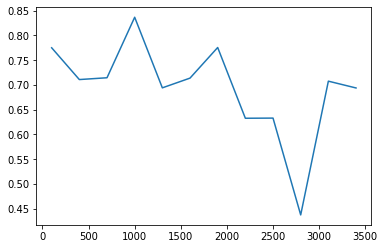

In [41]:
plt.figure()
plt.plot(iter_range,mean_f1, label='F1 change by number of features in MLP(50,20) model')
plt.show()

In [50]:
sup, n_ftrs, rank, important_features = get_n_most_important(1000, X, Y)

In [47]:
print(important_features)

['WC', 'Analytic', 'Clout', 'Authentic', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP', 'DATE', 'ORG', 'GPE', 'CARDINAL', 'PERCENT', 'ORDINAL', 'PERSON', 'NORP', 'MONEY', 'WORK_OF_ART', 'FAC', 'PRODUCT', 'LAW', 'LOC', 'EVENT',

## ROC of model build upon the most important features

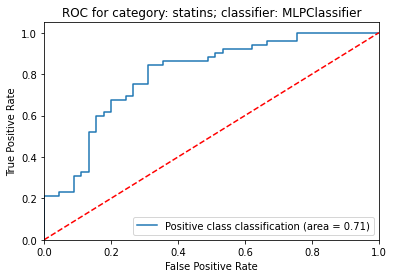

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        45
           1       0.75      0.69      0.72        52

    accuracy                           0.71        97
   macro avg       0.71      0.71      0.71        97
weighted avg       0.71      0.71      0.71        97



In [61]:
clf = MLPClassifier(max_iter=3000, solver='adam', hidden_layer_sizes=(50,20))
fit_clf_and_show_ROC(clf, X[important_features], Y, VALIDATION_SPLIT=0.2)